In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fraud.csv')
df.head()

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,INR,MasterCard,Online,1
1,2,198766,1777.32,EUR,American Express,Online,1
2,3,198767,3939.01,USD,Visa,In-Person,1
3,4,198768,376.44,USD,Visa,In-Person,0
4,5,198769,1687.33,INR,MasterCard,Online,1


In [4]:
df.isna().sum()

Cust ID       0
Card Num      0
Amount        0
Currency      0
Card Type     0
Trans Mode    0
Fraudlabel    0
dtype: int64

In [5]:
df = df.fillna(method = 'bfill')
df.isna().sum()

C:\Users\phani\AppData\Local\Temp\ipykernel_22580\214754001.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


Cust ID       0
Card Num      0
Amount        0
Currency      0
Card Type     0
Trans Mode    0
Fraudlabel    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cust ID     4000 non-null   int64  
 1   Card Num    4000 non-null   int64  
 2   Amount      4000 non-null   float64
 3   Currency    4000 non-null   object 
 4   Card Type   4000 non-null   object 
 5   Trans Mode  4000 non-null   object 
 6   Fraudlabel  4000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 218.9+ KB


In [7]:
df.describe()

,Cust ID,Card Num,Amount,Fraudlabel
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,200764.500000,2504.591608,0.501250
std,1154.844867,1154.844867,1460.663169,0.500061
min,1.000000,198765.000000,1.090000,0.000000
25%,1000.750000,199764.750000,1225.152500,0.000000
50%,2000.500000,200764.500000,2520.815000,1.000000
75%,3000.250000,201764.250000,3768.067500,1.000000
max,4000.000000,202764.000000,4996.700000,1.000000


array([[<Axes: title={'center': 'Cust ID'}>,
        <Axes: title={'center': 'Card Num'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Fraudlabel'}>]], dtype=object)

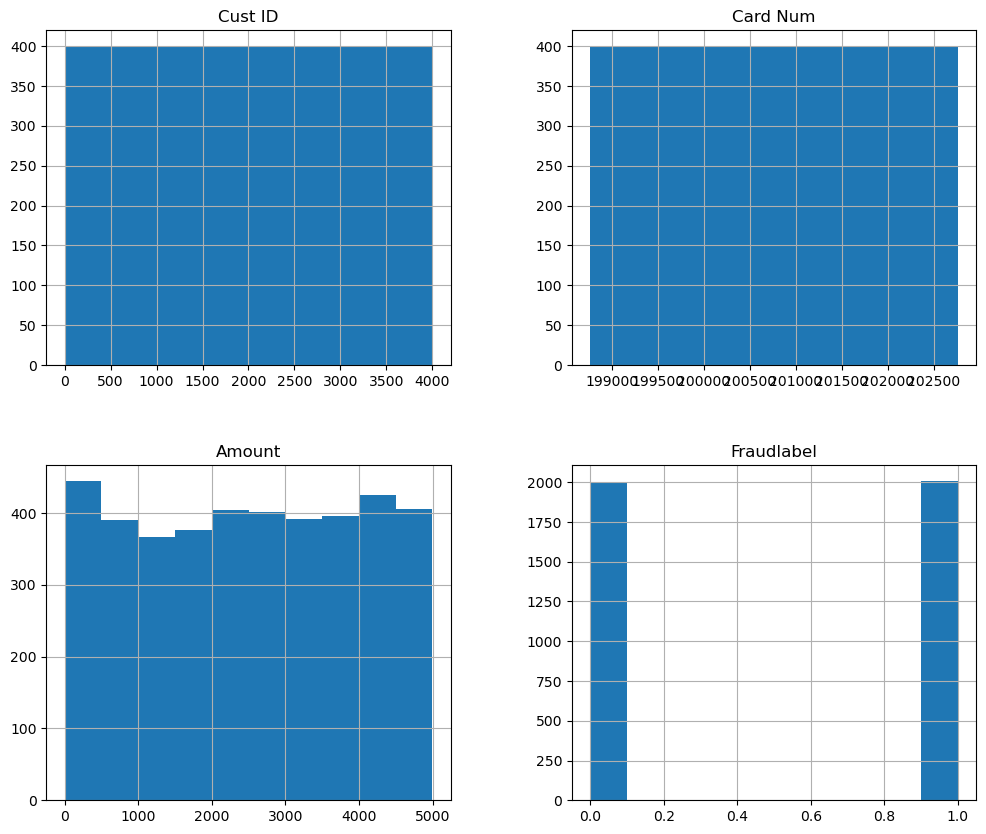

In [8]:
df.hist(figsize=(12,10))

<Axes: >

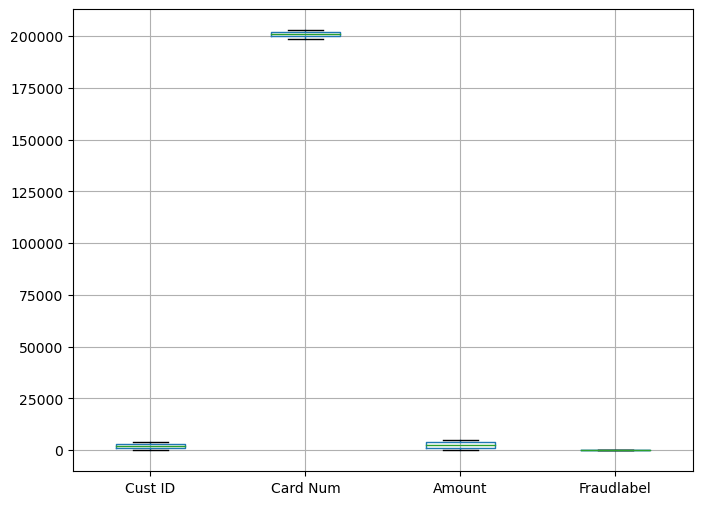

In [9]:
df.boxplot(figsize=(8,6))

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-package

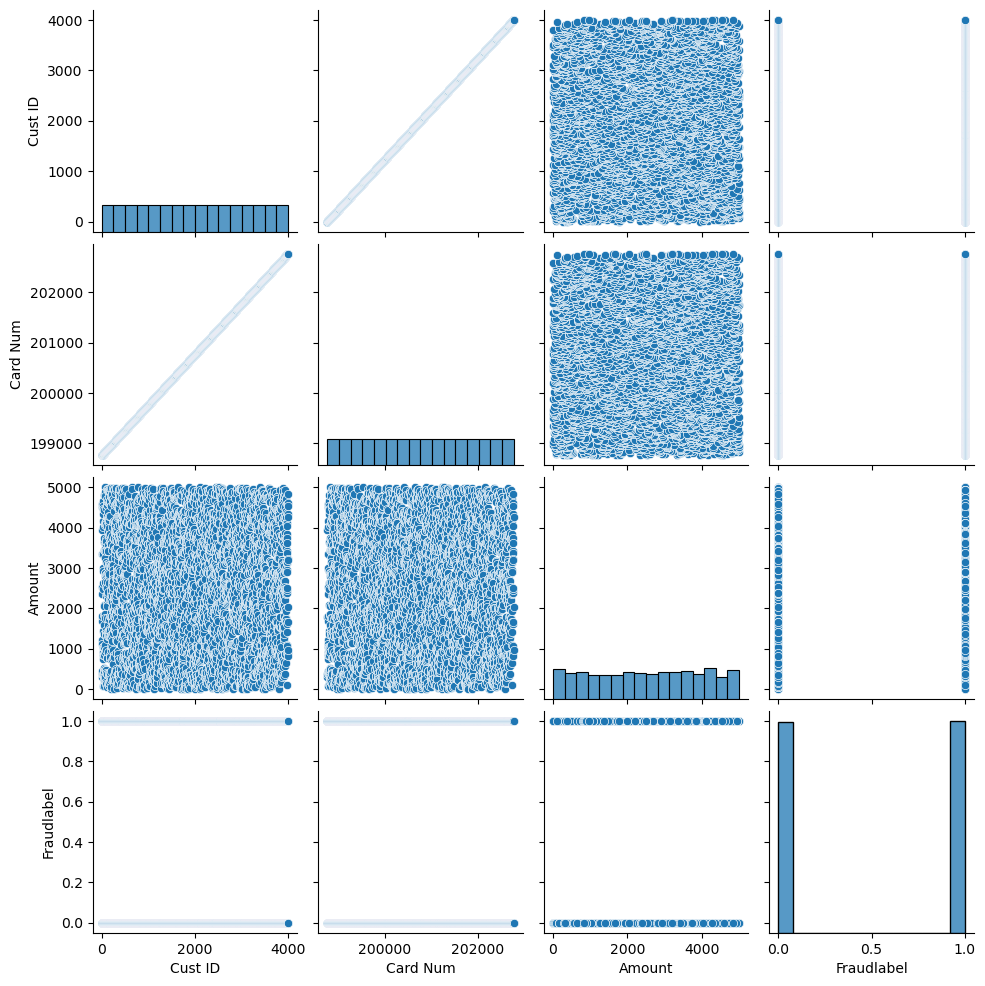

In [10]:
sns.pairplot(df)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Currency'] = le.fit_transform(df['Currency'])
df['Card Type'] = le.fit_transform(df['Card Type'])
df['Trans Mode'] = le.fit_transform(df['Trans Mode'])
df.head(4)

,Cust ID,Card Num,Amount,Currency,Card Type,Trans Mode,Fraudlabel
0,1,198765,285.88,1,1,1,1
1,2,198766,1777.32,0,0,1,1
2,3,198767,3939.01,2,2,0,1
3,4,198768,376.44,2,2,0,0


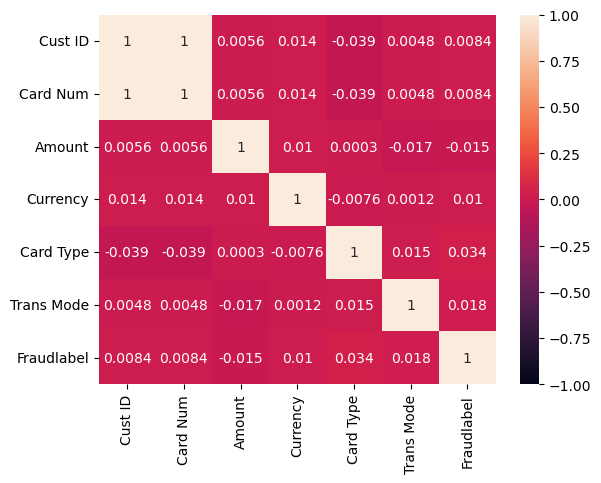

<Figure size 1600x2000 with 0 Axes>

In [15]:
sns.heatmap(df.corr(), annot = True, vmax=1, vmin=-1)
plt.figure(figsize=(16,20))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('**************************Training linear SVM model*********************************\n')
linear_svm_model=LinearSVC()
print('Training started....\n')
linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_linear = linear_svm_model.predict(xtest)
print('Predicted total is....\n', y_pred_linear)
print('\nTesting is also completed.....\n')

**************************Training linear SVM model*********************************

Training started....

Training completed....

Testing invoked....

Predicted total is....
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(ytest, y_pred_linear)
precision = precision_score(ytest, y_pred_linear, average='weighted')  
recall = recall_score(ytest, y_pred_linear, average='weighted')  
f1 = f1_score(ytest, y_pred_linear, average='weighted') 

print("***************SVM Model's Performance****************")
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

***************SVM Model's Performance****************

Accuracy: 0.48875
Precision: 0.2388765625
Recall: 0.48875
F1 Score: 0.32090890008396306


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the dataset into training, testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

# Training the model
print('**************************Training non-linear SVM model*********************************\n')
non_linear_svm_model = SVC(kernel='rbf')
print('Training started....\n')
non_linear_svm_model.fit(xtrain, ytrain)
print('Training completed....\n')

print('Testing invoked....\n')
y_pred_non_linear = non_linear_svm_model.predict(xtest)
print('Predicted total is....\n', np.unique(y_pred_non_linear))
print('\nTesting is also completed.....\n')

**************************Training non-linear SVM model*********************************

Training started....



E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

Training completed....

Testing invoked....



E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Predicted total is....
 [1]

Testing is also completed.....



In [21]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("***************Non-Linear SVM Model's Performance****************\n")
print('Mean Squared Error:\t',mean_squared_error(ytest,y_pred_non_linear))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,y_pred_non_linear)))
print()
print('R-Square value:\t',r2_score(ytest,y_pred_non_linear))

***************Non-Linear SVM Model's Performance****************



E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Mean Squared Error:	 0.51125

RMSE:	 0.7150174823037546

R-Square value:	 -1.0460358056265986


E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

In [22]:
print('*************Hyperparameters for linear SVM models***************\n')
print(linear_svm_model.get_params())
print()
print('*************Hyperparameters for non-linear SVM models***************\n')
print(non_linear_svm_model.get_params())

*************Hyperparameters for linear SVM models***************

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

*************Hyperparameters for non-linear SVM models***************

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


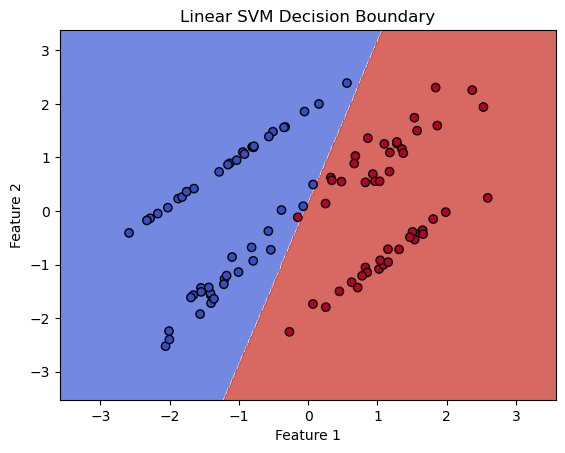

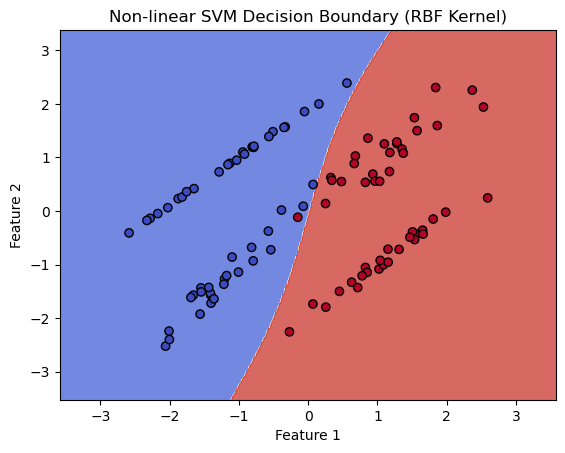

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Linear SVM
linear_svm_model = LinearSVC(C=1)
linear_svm_model.fit(X, y)

# Non-linear SVM with RBF kernel
non_linear_svm_model = SVC(C=1, kernel='rbf', gamma=0.1)
non_linear_svm_model.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for both models
plot_decision_boundary(linear_svm_model, X, y, 'Linear SVM Decision Boundary')
plot_decision_boundary(non_linear_svm_model, X, y, 'Non-linear SVM Decision Boundary (RBF Kernel)')

In [26]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

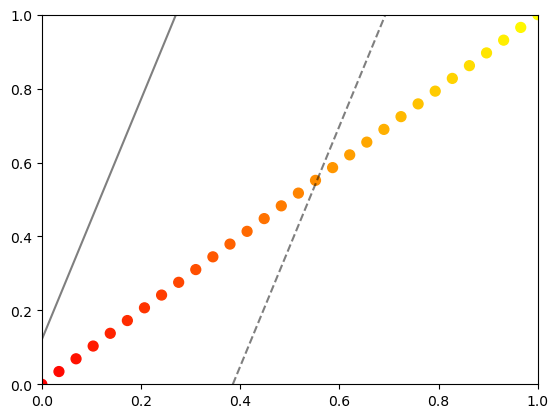

In [27]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
 
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [28]:
print('Linear model support vectors are:\n')
model.support_vectors_

Linear model support vectors are:



array([[ 0.55942643,  2.38869353],
       [ 0.07123641,  0.49429823],
       [-0.07133524,  0.08896214],
       [-0.38566776,  0.01722979],
       [-0.53963044, -0.72427983],
       [ 0.15513175,  1.99805321],
       [-0.57500215, -0.3751207 ],
       [ 0.480502  ,  0.54914434],
       [-0.15013844, -0.11708689],
       [ 0.25058844,  0.13979096],
       [ 0.32725188,  0.62453032],
       [ 0.68057323,  1.02703224],
       [ 0.34129395,  0.57304248]])

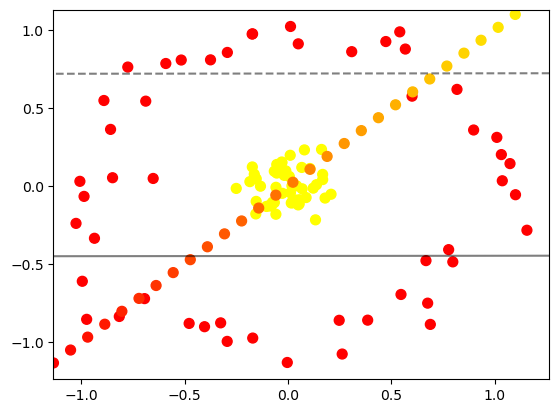

In [29]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=0.1)
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

In [30]:
non_linear_svm_model.fit(X, y)
non_linear_support_vectors = non_linear_svm_model.support_vectors_
print("Non-linear model support vectors are:\n")
print(non_linear_support_vectors)

Non-linear model support vectors are:

[[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-2.2813861  -0.1368559 ]
 [ 0.480502    0.54914434]
 [ 2.59123946  0.24472415]
 [ 1.65214494 -0.35885569]
 [-1.40735658 -1.56826626]
 [-0.81680628 -0.6795874 ]
 [ 0.71479373 -1.42922002]
 [-0.15013844 -0.11708689]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-0.05319823  1.85605469]
 [-2.02632079  0.06194498]
 [ 1.28008347  1.28938375]
 [ 0.96423311  0.55600276]
 [-1.87653774  0.23085877]
 [-1.09831681 -0.86023823]
 [ 1.03110238  0.55448398]
 [-0.50833095  1.48052803]
 [-1.40210053 -1.72067112]
 [ 0.85239186 -1.14658127]
 [ 0.06845616 -1.73597973]
 [ 1.53703587 -0.53355799]
 [-1.64832073  0.4176729 ]
 [ 1.17869556  1.09180466]
 [-0.3313761   1.56931739]
 [-1.00634985 -1.14054824]
 [-0.53963044 -0.72427983]
 [ 1.08659413 -1.00544254]
 [ 0.82584805  0.53479393]
 [ 0.34129395  0.57304248]
 [ 1.15199146 -0.71352532]
 [-0.34898484  1.56010259]
 [-1.03223274  0.94800532]
 [ 2.36867367  2

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear) 

E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Performance metrics for linear SVM
linear_accuracy = accuracy_score(ytest, y_pred_linear)
linear_precision = precision_score(ytest, y_pred_linear, average='weighted')
linear_recall = recall_score(ytest, y_pred_linear, average='weighted')
linear_f1 = f1_score(ytest, y_pred_linear, average='weighted')
linear_conf_matrix = confusion_matrix(ytest, y_pred_linear)

# Performance metrics for non-linear SVM
non_linear_accuracy = accuracy_score(ytest, y_pred_non_linear)
non_linear_precision = precision_score(ytest, y_pred_non_linear, average='weighted')
non_linear_recall = recall_score(ytest, y_pred_non_linear, average='weighted')
non_linear_f1 = f1_score(ytest, y_pred_non_linear, average='weighted')
non_linear_conf_matrix = confusion_matrix(ytest, y_pred_non_linear)

# Display the results
print("******************Linear SVM Performance Metrics*********************\n")
print(f"Accuracy: {linear_accuracy:.4f}")
print(f"Precision: {linear_precision:.4f}")
print(f"Recall: {linear_recall:.4f}")
print(f"F1 Score: {linear_f1:.4f}")
print("Confusion Matrix:")
print(linear_conf_matrix)

print("\n******************Non-linear SVM Performance Metrics**********************\n")
print(f"Accuracy: {non_linear_accuracy:.4f}")
print(f"Precision: {non_linear_precision:.4f}")
print(f"Recall: {non_linear_recall:.4f}")
print(f"F1 Score: {non_linear_f1:.4f}")
print("Confusion Matrix:")
print(non_linear_conf_matrix)

******************Linear SVM Performance Metrics*********************

Accuracy: 0.4888
Precision: 0.2389
Recall: 0.4888
F1 Score: 0.3209
Confusion Matrix:
[[  0 409]
 [  0 391]]

******************Non-linear SVM Performance Metrics**********************

Accuracy: 0.4888
Precision: 0.2389
Recall: 0.4888
F1 Score: 0.3209
Confusion Matrix:
[[  0 409]
 [  0 391]]


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
